## Final Project

- Main Questions:
We aim to understand the correlation between the timing of Twitter account creation and
the level of engagement regarding current events in the platform. This could help us determine
if certain world events, such as the COVID-19 pandemic or the #BLM movement, influenced the creation of new
accounts or if accounts created during specific periods are more active in discussing "hot topics".

- Data Resources:
We would be using the *acc_age* field, which represents the age of the accounts in days and
the verified status to measure credibility which potentially affects the account’s engagement
and reach. Additionally, by using the accounts’ creation date, we can categorize the accounts
by year and find in which year/period were created the highest number of accounts. This
could help us determine if accounts created during the pandemic were more engaged in
COVID-19 related tweets than older accounts or vice versa. Other relevant fields include
date, which indicates when each tweet was posted, allowing us to temporally analyze tweet
volume over time. Finally, we would have engagement metrics like rt rt count (retweet
count), rt reply count (reply count), and rt fav count (like count), which will help us measure
the influence and reach of the tweets from these accounts. By looking at these data fields, we
can understand how Twitter accounts created at different times contribute to the discourse
on COVID-19, exploring whether significant world events like the pandemic have increased
account creations or if these newly created accounts engage differently with the topic.

In [5]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#Insert YOUR path to data
#data = 

data = pd.read_pickle("/Users/emmanguyen/Downloads/BLM_StopAsianHate.pkl")

In [7]:
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Index: 1678460 entries, 1771 to 174882
Data columns (total 77 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   tweetid                1678460 non-null  int64              
 1   userid                 1678460 non-null  int64              
 2   screen_name            1678460 non-null  object             
 3   date                   1678460 non-null  datetime64[ns, UTC]
 4   lang                   1678460 non-null  object             
 5   location               1023285 non-null  object             
 6   place_id               12259 non-null    object             
 7   place_url              12259 non-null    object             
 8   place_type             12259 non-null    object             
 9   place_name             12259 non-null    object             
 10  place_full_name        12259 non-null    object             
 11  place_country_code     1224

,tweetid,userid,screen_name,date,lang,location,place_id,place_url,place_type,place_name,...,qtd_state,qtd_country,norm_country,norm_rt_country,norm_qtd_country,is_kw,description,rt_user_description,qtd_user_description,acc_age
1771,1220644546771591168,95655465,shaunrein,2020-01-24 09:48:33+00:00,en,Shanghai (8621) 6326-9991 info@researchcmr.com,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
10596,1220646659052326914,901844487315406850,friendofwinter,2020-01-24 09:56:56+00:00,en,"bts, blackpink, and girlgroups",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
11024,1220646239630315520,1110768577953460226,JENDERALISA,2020-01-24 09:55:16+00:00,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
13401,1220643783286644736,2530100864,MSasisom,2020-01-24 09:45:31+00:00,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
14390,1220642807930478592,150572999,jackrizley,2020-01-24 09:41:38+00:00,en,"Bangkok, Thailand",NaN,NaN,NaN,NaN,...,NaN,NaN,Thailand,Switzerland,NaN,True,NaN,NaN,NaN,NaN
15547,1220641695651389440,859287999539929090,zqmkni,2020-01-24 09:37:13+00:00,en,ty track’s heart,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
15708,1220641540063649794,1054619120753242113,TheVandelay,2020-01-24 09:36:36+00:00,en,Hell,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
16099,1220641114576699392,4363890732,phiisu_,2020-01-24 09:34:54+00:00,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
16470,1220640742097342464,1694181907,i_Aeoy,2020-01-24 09:33:25+00:00,en,"Thailand,Chonburi",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Switzerland,NaN,True,NaN,NaN,NaN,NaN
17427,1220639678631727105,966319144315449349,IC_muchie,2020-01-24 09:29:12+00:00,en,India,NaN,NaN,NaN,NaN,...,NaN,NaN,India,Switzerland,NaN,True,NaN,NaN,NaN,NaN


- Create 'year_posted' from 'date'

In [8]:
data['date'] = pd.to_datetime(data['date'], format='mixed')
data['year_posted'] = data['date'].dt.year
data['year_posted'] = pd.to_numeric(data['year_posted'])
#print(data.info())
print(data['year_posted'].head(15))

29075     2021
17272     2021
38446     2020
16418     2020
53175     2020
78531     2021
116174    2021
33404     2020
126940    2022
56312     2021
50696     2021
54016     2021
19845     2021
32530     2021
33388     2022
Name: year_posted, dtype: int32


- This function gives us a score to measure credibility depending on how old a account is in comparison with the oldest account

In [9]:
max_age = int(data['acc_age'].max())
print(f"Oldest Account is {max_age} days or {round(max_age/360)} years old")

def credibility(days):
    if days <= 0 or days > max_age:
        return None
    score = int((days / max_age) * 100)
    score = max(1, score)
    score = min(100, score)  
    if score <= 25:
        cred = "unreliable"
    elif score <= 50:
        cred = "somewhat unreliable"
    elif score <= 75:
        cred = "somewhat reliable"
    else:
        cred = "reliable"
    return cred

Oldest Account is 5715 days or 16 years old


- Group the tweets by 'year_posted' and plot it

In [10]:
plot1 = data.groupby('year_posted').size()
top_year = plot1.idxmax()
top_year_count = plot1.max()

print(f"The year with the highest number of tweets posted is {top_year} with {top_year_count} tweets.")

The year with the highest number of tweets posted is 2021 with 88163 tweets.


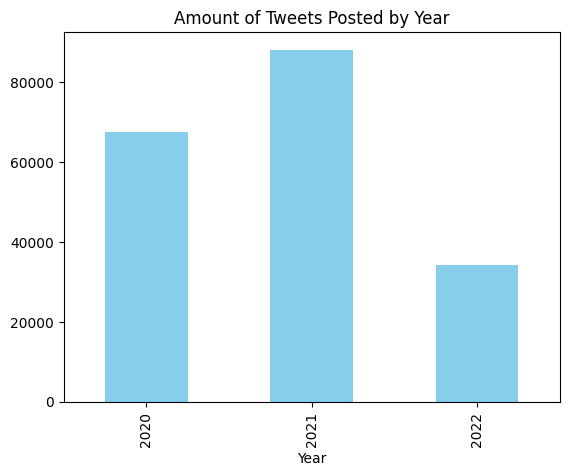

In [11]:
plot1.plot(kind='bar', color='skyblue')
plt.title('Amount of Tweets Posted by Year')
plt.xlabel('Year')
plt.ylabel('')

plt.show()

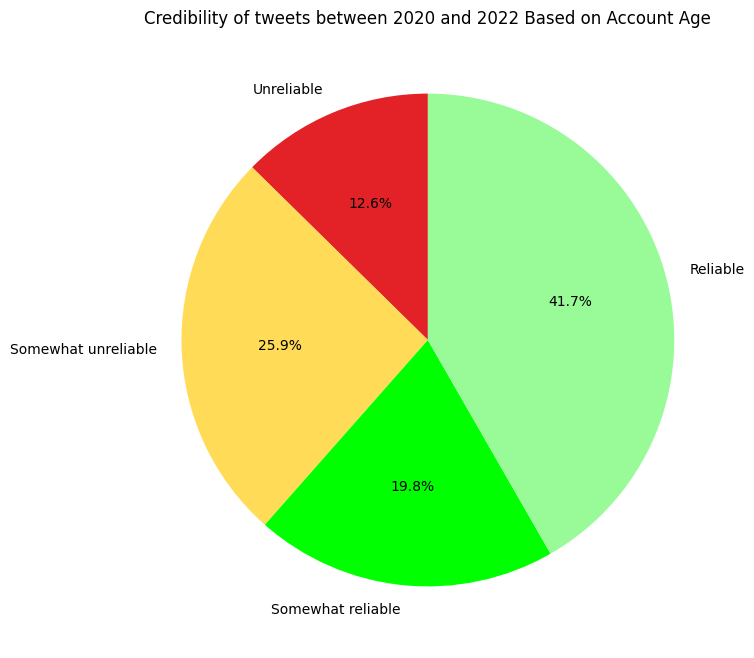

In [12]:
data['acc_age'] = data['acc_age'].fillna(0).astype(int)
data['credit'] = data['acc_age'].apply(credibility)
# print(data['credit'].head(15))

plot2 = data.groupby('credit').size().reset_index(name='credit_count')

plt.figure(figsize=(8, 8)) 
hue = ['#E32227', '#FFDB58', '#00FF00', '#98fb98']
plt.pie(plot2['credit_count'], labels=['Unreliable', 'Somewhat unreliable', 'Somewhat reliable', 'Reliable'],
        autopct='%1.1f%%', startangle=90, colors=hue)
plt.title('Credibility of tweets between 2020 and 2022 Based on Account Age')
plt.show()

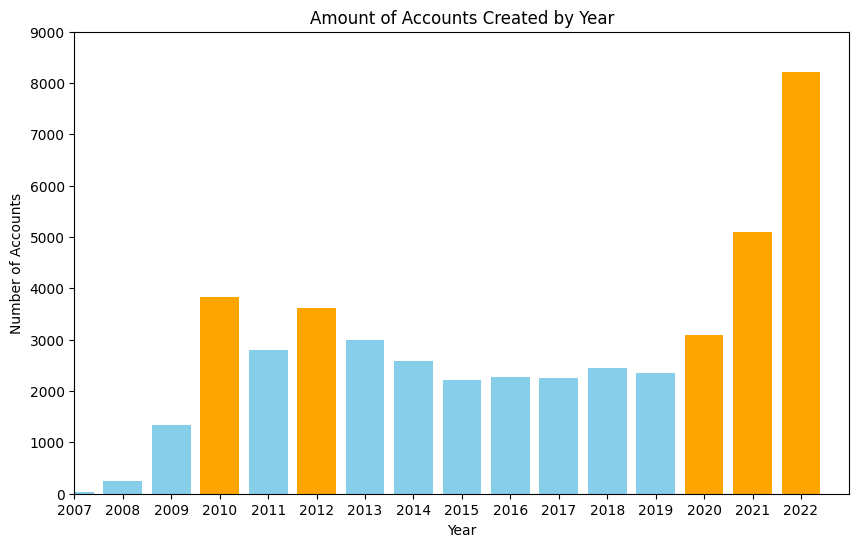

In [13]:
def year(days):
    downl_year = 2023
    if days <= 0 or days > max_age:
        return 0
    yr_count = days / 365
    yr = downl_year - yr_count
    return int(yr)

data['yr_created'] = data['acc_age'].apply(year)

plot3 = data.groupby('yr_created')['userid'].size().reset_index(name='acc_count')
top5_yr = plot3.nlargest(6, 'acc_count')['yr_created']
colors = ['skyblue' if yr not in top5_yr.values else 'orange' for yr in plot3['yr_created']]

plt.figure(figsize=(10, 6))
plt.bar(plot3['yr_created'], plot3['acc_count'], color= colors)
plt.title('Amount of Accounts Created by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accounts')
plt.xlim(2007, 2023)
plt.ylim(0, 9000)
plt.xticks(range(2007, 2023, 1))

plt.show()

## Question:
What are alternative factors we can take into account, and what statistics would be helpful for our analysis? How should we incorporate major events such as #BLM and #StopAsianHate into our project?